<div class='bar_title'></div>

*Smart Cities and Geospatial Data Analysis*

# Assignment 5: Spatial Weights

Gunther Gust / Ignacio Ubeda<br>
Chair for Enterprise AI

Winter Semester 23/24

*Credits: Most of the material is taken from [Arribas-Bel, Geographic Data Science](https://darribas.org/gds_course/content/home.html#)*

In [1]:
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

from pysal.lib import weights
from pysal.lib import examples

## Task I: NYC tracts

In this task we will explore contiguity weights. To do it, we will load Census tracts for New York City. Census tracts are the geography the US Census Burearu uses for areas around 4,000 people. We will use a dataset prepared as part of the [PySAL examples](https://pysal.org/libpysal/tutorial.html?highlight=examples#example-datasets). Geographically, this is a set of polygons that cover all the area of the city of New York.

A bit of info on the dataset:

In [2]:
examples.explain("NYC Socio-Demographics")

To check out the location of the files that make up the dataset, we can load it with `load_example` and inspect with `get_file_list`:

In [3]:
# Load example (this automatically downloads if not available)
nyc_data = examples.load_example("NYC Socio-Demographics")
# Print the paths to all the files in the dataset
nyc_data.get_file_list()

['/Users/iubeda/Library/Application Support/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.prj',
 '/Users/iubeda/Library/Application Support/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shx',
 '/Users/iubeda/Library/Application Support/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shp',
 '/Users/iubeda/Library/Application Support/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.dbf',
 '/Users/iubeda/Library/Application Support/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.prj',
 '/Users/iubeda/Library/Application Support/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shx',
 '/Users/iubeda/Library/Application Support/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shp',
 '/Users/iubeda/Library/Application Support/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.dbf']

And let's read the shapefile:

In [4]:
nyc = gpd.read_file(nyc_data.get_path("NYC_Tract_ACS2008_12.shp"))


print(type(nyc))
print(nyc.shape)
nyc.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(2166, 114)


,UNEMP_RATE,cartodb_id,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,popover18,...,geo_geoid,shape_leng,shape_area,ct2010,boroct2010,borocode,tractid,popdty,geo_fips,geometry
0,0.000000,1,0,0,0,0,0,0,0,0,...,08000US360614491951000000100,11023.047911,1.844421e+06,100.0,1000100.0,1.0,1.00,0.00,3.606140e+20,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,0.081705,2,228,353,47,694,0,92,2773,2351,...,08000US360614491951000000201,4748.703641,9.716282e+05,201.0,1000201.0,1.0,2.01,79619.05,3.606140e+20,"POLYGON ((-73.98450 40.70951, -73.98655 40.709..."
2,0.170603,3,658,1577,198,2589,36,549,8339,6878,...,08000US360614491951000000202,8568.208357,3.315121e+06,202.0,1000202.0,1.0,2.02,72326.46,3.606140e+20,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ..."
3,0.000000,4,0,0,0,0,0,0,0,0,...,08000US360614491951000000500,32407.899284,9.081808e+06,500.0,1000500.0,1.0,5.00,0.00,3.606140e+20,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,0.088037,5,736,1382,194,2953,19,379,10760,8867,...,08000US360614491951000000600,6973.204078,2.583270e+06,600.0,1000600.0,1.0,6.00,109785.00,3.606140e+20,"POLYGON ((-73.99022 40.71440, -73.98934 40.714..."


<Axes: >

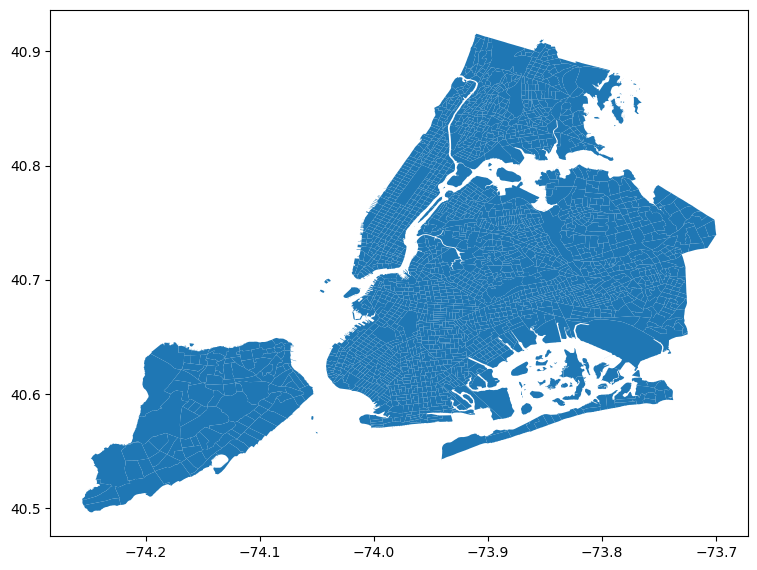

In [5]:
nyc.plot(figsize=(9, 9))

Now with the `nyc` object ready to go, here a few tasks for you to complete:

### Create a contiguity matrix using the queen criterion

In [6]:
w_queen = weights.Queen.from_dataframe(nyc, ids='cartodb_id')
w_queen

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass5/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 1, 627, 2166.
  warnings.warn(message)


### Let's focus on [Central Park](https://en.wikipedia.org/wiki/Central_Park). The corresponding polygon is ID `143`. *How many neighbors does it have?*

In [7]:
w_queen.cardinalities[143]

30

### Try to reproduce the [zoom ploot](https://darribas.org/gds_course/content/bE/lab_E.html#lab-e-queen-zoom) for Central Park

**Hint 1:** For filtering the neighbors you could use the `.isin()` method that returns a boolean mask. If you have a `list` of values to keep, this is the syntax:

```
boolean_mask = df['column_to_filter'].isin(list_of_values_to_keep)
df.loc[boolean_mask]
```

**Hint 2:** The center of the Central Park is located on (-73.9655834, 40.7825547)

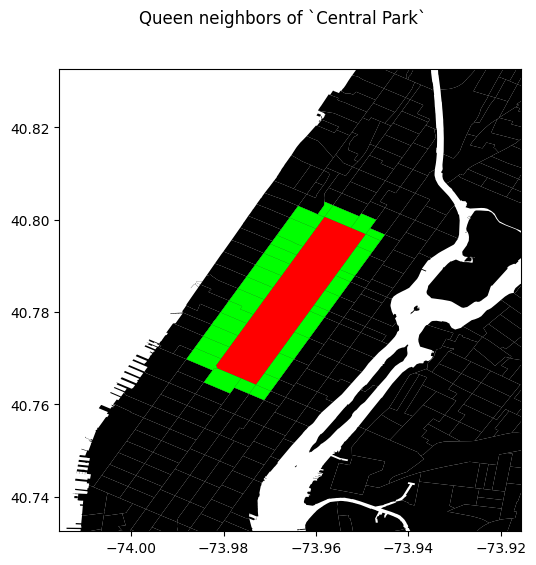

In [8]:
# Setup figure
f, ax = plt.subplots(1, figsize=(6, 6))

# Plot base layer of polygons
nyc.plot(ax=ax, facecolor='k', linewidth=0.1)

# Select focal polygon
focus = nyc.loc[(nyc['cartodb_id']==143), ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)

# Plot neighbors
neis = nyc.loc[(nyc['cartodb_id'].isin(w_queen.neighbors[143])), :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)

# Title
f.suptitle("Queen neighbors of `Central Park`")

# Style and display on screen
#Manually set
offset = 0.05
central_park_center = (-73.9655834, 40.7825547)

ax.set_ylim(central_park_center[1]-offset, central_park_center[1]+offset)
ax.set_xlim(central_park_center[0]-offset, central_park_center[0]+offset)
plt.show()

### Create a block spatial weights matrix where every tract is connected to other tracts in the same borough. For that, use the `borocode` column of the `nyc` table.

In [9]:
w_block = weights.block_weights(nyc['borocode'])

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass5/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


### Compare the number of neighbors by tract for the two weights matrices, *which one has more? why?*

This one is more advanced, so don't despair if you can't get it on your first try!

**Hint:** Note that the index for `w_queen` is `cartodb_id` while the index for `w_block` is the same index as `nyc`. Mind this when you're merging your results

In [10]:
#create dataframe with w_queen card for each cartodb_id
queen_card_df = pd.DataFrame.from_dict(w_queen.cardinalities, orient='index', columns=['queen_card'])\
    .reset_index(drop=False, names='cartodb_id')

print(queen_card_df.shape)
queen_card_df.head()

(2166, 2)


,cartodb_id,queen_card
0,1,0
1,2,3
2,3,5
3,4,3
4,5,4


In [11]:
#create dataframe with cartodb_id
comparison_df = nyc[['cartodb_id']]

#add the queen cardinalities
comparison_df = pd.merge(comparison_df, queen_card_df, how='inner', on='cartodb_id')

#add the block cardinalities
comparison_df['block_card'] = pd.Series(w_block.cardinalities)

#create a column to check if block cardinality is greater than queen cardinality
comparison_df['block_greater'] = comparison_df['block_card'] > comparison_df['queen_card']

#compute the percentage of tracts where block > queen
print((comparison_df['block_greater'].sum())/comparison_df.shape[0])

print(comparison_df.shape)
comparison_df.head()

1.0
(2166, 4)


,cartodb_id,queen_card,block_card,block_greater
0,1,0,287,True
1,2,3,287,True
2,3,5,287,True
3,4,3,287,True
4,5,4,287,True


#### Answer the question here:

The `w_block` has more neighbors (and for every tract) than `w_queen`. This is because the definition of a neighbor in `w_block`: every tract of the same category (in this case `borocode`) is defined as a neighbor in `w_block`. While in the `w_queen`, two geometries need to share at least one vortex (a single point) of their boundaries to be considered neighbors.

Note that is not the case that the block criteria will **always** result in more neighbors than the queen criteria. Therefore this result will depend on each dataset.

## Task II: Japanese cities

In this task, you will be generating spatial weights matrices based on distance. We will test your skills on this using a [dataset](http://www.oecd.org/cfe/regionaldevelopment/functional-urban-areas.htm) of Japanese urban areas provided by [OECD](http://www.oecd.org). Let's get it ready for you to work on it directly.

In [12]:
filepath = os.path.join('data', 'JPN', 'JPN_core.shp')
jp_cities = gpd.read_file(filepath)

print(type(jp_cities))
print(jp_cities.shape)
jp_cities.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(61, 3)


,fuacode,fuaname,geometry
0,JPN47,Isesaki,"MULTIPOLYGON Z (((139.32669 36.63338 0.00000, ..."
1,JPN35,Kochi,"MULTIPOLYGON Z (((133.50243 33.46526 0.00000, ..."
2,JPN04,Fukuoka,"MULTIPOLYGON Z (((130.26444 33.59449 0.00000, ..."
3,JPN32,Fukui,"MULTIPOLYGON Z (((135.96490 35.99799 0.00000, ..."
4,JPN45,Kusatsu,"POLYGON Z ((135.98334 35.12212 0.00000, 136.00..."


If we make a quick plot, we can see these are polygons covering the part of the Japanese geography that is considered urban by their analysis:

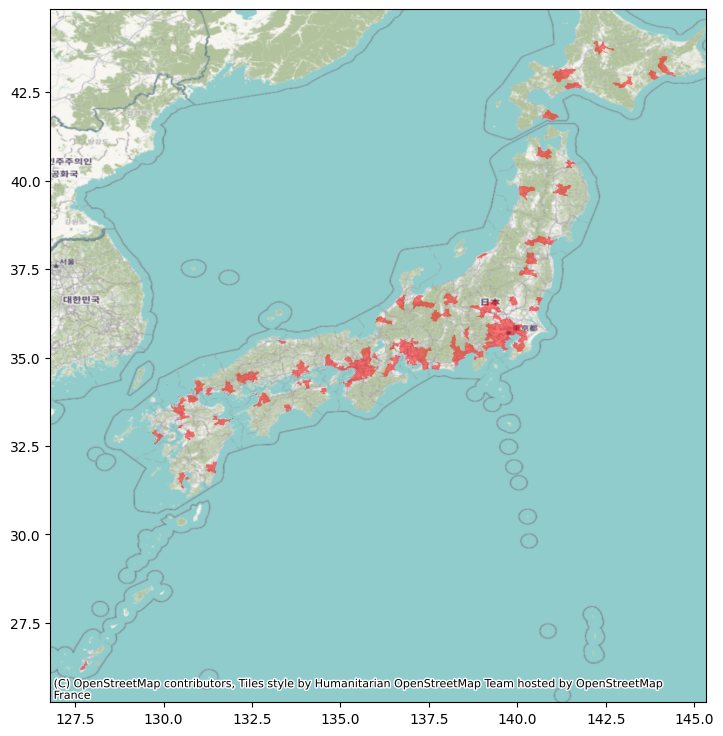

In [13]:
f, ax = plt.subplots(1, figsize=(9, 9))
jp_cities.plot(ax=ax, color="red", alpha=0.5)
cx.add_basemap(ax=ax, crs=jp_cities.crs)
plt.show()

For this example, we need two transformations: lon/lat coordinates to a geographical projection, and polygons to points. To calculate distances effectively, we need to ensure the coordinates of our geographic data are expressed in metres (or a similar measurement unit). The original dataset is expressed in lon/lat degrees:

In [14]:
jp_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can use the Japan Plane Rectangular CS XVII system ([`EPSG:2459`](http://epsg.io/2459)), which is expressed in metres:

In [15]:
jp = jp_cities.to_crs(epsg=2459)

So the resulting table is in metres:

In [16]:
jp.crs

<Projected CRS: EPSG:2459>
Name: JGD2000 / Japan Plane Rectangular CS XVII
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - onshore Okinawa-ken east of 130°E.
- bounds: (131.12, 24.4, 131.38, 26.01)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone XVII
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now, distances are easier to calculate between points than between polygons. Hence, we will convert the urban areas into their centroids:

In [17]:
jp.geometry = jp.geometry.centroid

print(type(jp))
print(jp.shape)
jp.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(61, 3)


,fuacode,fuaname,geometry
0,JPN47,Isesaki,POINT (744656.521 1192225.649)
1,JPN35,Kochi,POINT (232966.930 842764.514)
2,JPN04,Fukuoka,POINT (-50005.454 840043.715)
3,JPN32,Fukui,POINT (470562.738 1126054.787)
4,JPN45,Kusatsu,POINT (453539.455 1013387.888)


So the result is a seet of points expressed in metres:

<Axes: >

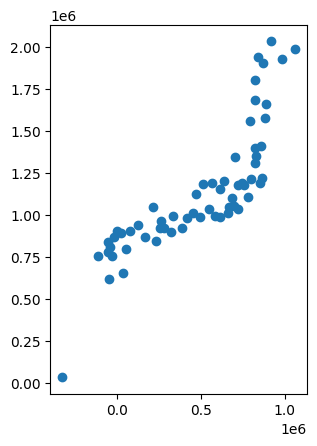

In [18]:
jp.plot()

With these at hand, tackle the following challenges:

**Hint:** You can use `fuaname` column as the `ids` parameter for computing the spatial weight matrices

### Generate a spatial weights matrix with five nearest neighbors

In [19]:
w_knn5 = weights.KNN.from_dataframe(jp, k=5, ids='fuaname')
w_knn5

### Generate a spatial weights matrix with a 10km distance band

**Note:** Remember the dataset is expressed in metres, not kilometres!

In [20]:
w_dist_band_10km = weights.DistanceBand.from_dataframe(jp, 10e4, ids='fuaname')
w_dist_band_10km

/Users/iubeda/repos/SC-GSDA-WS2324/Assignments/env_ass5/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 4 islands with ids: Asahikawa, Naha, Niigata, Hakodate.
  warnings.warn(message)



### Compare the two in terms of **average number of neighbors**. *What are the main differences you can spot? In which cases do you think one criterion would be preferable over the other?*

In [21]:
knn5_card = pd.Series(w_knn5.cardinalities)
dist_band_10km_card = pd.Series(w_dist_band_10km.cardinalities)

print(f"average number of neighbors knn5: {knn5_card.mean()}")
print(f"average number of neighbors 10kmB: {dist_band_10km_card.mean()}")

average number of neighbors knn5: 5.0
average number of neighbors 10kmB: 3.3114754098360657


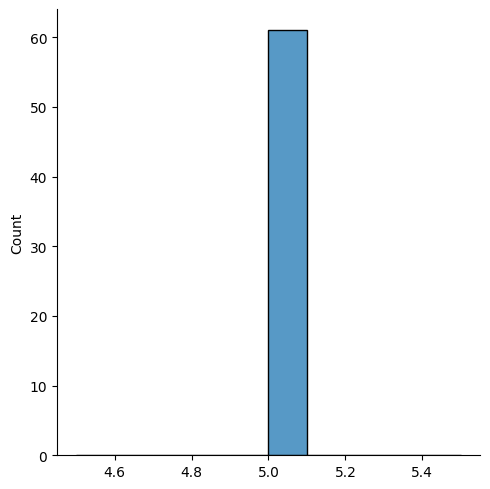

In [22]:
sns.displot(knn5_card, bins=10)

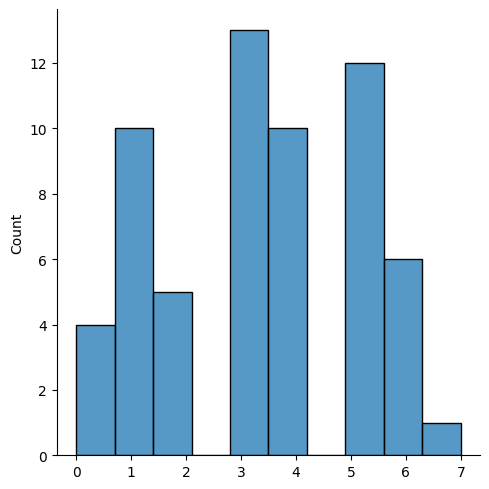

In [23]:
sns.displot(dist_band_10km_card, bins=10)

#### Answer the question here:

- The number of neighbors using `KNN` will always be `k` (provided that they are enough geometries), in this case 5 (see distribution plot above)

- The number of neighbors using `DistanceBand` will depend on how close the geometries are. In this case, the mean number of neighbors is 3.31 and varies from 0 to 7 (see distribution plot above)

The `KNN` is preferable when you want to get neighbors regardless of the distance between them. So you'll always get a number of neighbors but the distance to get them could be really high (and could also varies a lot). The `DistanceBand` is preferable when you care about the distance but not the number of neighbors since only the geometries that falls within the radius will be considered as neighbors in this case.

**Note that there is no criteria better than other, you should be aware to the differences and learn when is better to apply one over another**

The final task below is a bit more involved, so do not despair if you cannot get it to work completely!

### Focus on Tokyo and the 10km spatial weights generated above. Try to create a figure similar to [the one in the example](https://darribas.org/gds_course/content/slides/block_E_ii.html#/section-3). 


Here's a recipe:
1. Generate a buffer of 10Km around the Tokyo centroid
1. Start the plot with the Tokyo polygon (of `jp_cities`) in color `"xkcd:coral"`
1. Add its neighbors in `"xkcd:sky blue"`
1. Add their centroids (Tokyo and neighbors) in color `"white"`
1. Layer on top the buffer, making sure only the edge is colored in `"xkcd:green yellow"` (`facecolor="none"`)
1. Add a basemap with `CartoDB.DarkMatter` theme

**Hint 1:** For generating a buffer, you can use the `.buffer(distance)` method on a POINT geometry, where `distance` is a parameter to set. Note that we've already computed Tokyo centroid in the `jp` dataframe.

**Hint 2:** Make sure to plot every layer in the same projection: `jp.crs`



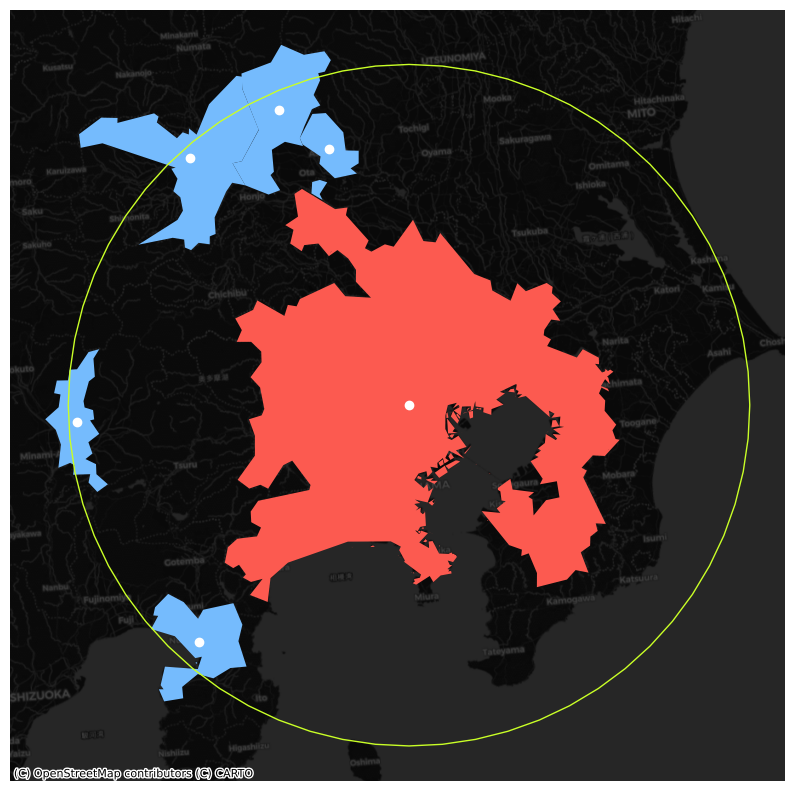

In [24]:
#create dataframes to plot
buff = jp.loc[jp['fuaname']=='Tokyo'].buffer(10e4)
tokyo = jp_cities.loc[jp["fuaname"]== 'Tokyo']
tokyo_neighbors = jp_cities.loc[jp_cities['fuaname'].isin(w_dist_band_10km.neighbors['Tokyo']), :]

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(10, 11))

#add Tokyo polygon
tokyo.to_crs(jp.crs).plot(ax=ax, color="xkcd:coral")

#add neighbors of Tokyo
tokyo_neighbors.to_crs(jp.crs).plot(ax=ax, color="xkcd:sky blue")

#add centroids
tokyo.to_crs(jp.crs).centroid.plot(ax=ax, color="white")
tokyo_neighbors.to_crs(jp.crs).centroid.plot(ax=ax, color="white")

#add buffer
buff.to_crs(jp.crs).plot(ax=ax, facecolor="none", edgecolor="xkcd:green yellow")

cx.add_basemap(ax=ax, crs=jp.crs, source=cx.providers.CartoDB.DarkMatter)

# Remove axis frames
ax.set_axis_off()

# Display
plt.show()

If all goes well, your figure should look, more or less, like:

![Tokyo buffer](data/tokyo_buffer.png)


## Task III: Spatial Lag

For this task, we will rely on the AHAH dataset (same as the previous assignment). Let's create the `ahah` object:

In [25]:
#Read lsoas
filepath = os.path.join('data', 'Access_to_Healthy_Assets_and_Hazards_AHAH', 'Local_Authority_Districts', 'E08000012', 'shapefiles', 'E08000012.shp')
lsoas = gpd.read_file(filepath)
lsoas = lsoas.to_crs(epsg=4326)

#Read ahah data
filepath = os.path.join('data', 'Access_to_Healthy_Assets_and_Hazards_AHAH', 'Local_Authority_Districts', 'E08000012', 'tables', 'E08000012.csv')
ahah_data = pd.read_csv(filepath)

#Join geometries with features
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")

print(type(ahah))
print(ahah.shape)
ahah.head()


<class 'geopandas.geodataframe.GeoDataFrame'>
(298, 51)


,lsoa11cd,geometry,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,g_exp,...,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
0,E01006512,"POLYGON ((-2.96246 53.39960, -2.96246 53.39960...",Liverpool 031A,31239,3055,31351,35965,30.888481,1.725173,31.123073,...,8,4,9,9,8,9,3,9,4,10
1,E01006513,"POLYGON ((-2.97645 53.40005, -2.97651 53.40007...",Liverpool 060A,41456,2213,37636,35878,90.685995,1.236631,50.819353,...,10,1,9,10,10,9,8,9,4,10
2,E01006514,"POLYGON ((-2.97161 53.40014, -2.97161 53.40016...",Liverpool 037A,37258,4510,39228,35143,49.017998,2.594648,60.485044,...,9,2,10,10,9,9,9,9,4,10
3,E01006515,"POLYGON ((-2.97963 53.39407, -2.97966 53.39412...",Liverpool 037B,34254,6931,29900,35065,38.227117,4.118458,28.254809,...,9,1,10,8,9,9,1,9,4,10
4,E01006518,"POLYGON ((-2.97352 53.39028, -2.97352 53.39028...",Liverpool 044A,25433,7533,37244,34392,21.166678,4.513573,48.953916,...,5,2,10,7,7,8,8,8,4,10


### Create the spatial lag (Queen approach) of the overall score

**Note:** Recall that `lsoa11cd` is the id of the DataFrame and the score is stored in the `ahah` column

In [26]:
# Create the queen matrix
w_queen = weights.Queen.from_dataframe(ahah, idVariable="lsoa11cd")

# Row-standardize the queen matrix
w_queen.transform = 'R'

# Compute spatial lag of `ahah` score
w_queen_score = weights.lag_spatial(w_queen, ahah["ahah"])

/var/folders/td/mhppvrk10nj_1j1gl_dk2pvc0000gn/T/ipykernel_77917/2406977778.py:2: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w_queen = weights.Queen.from_dataframe(ahah, idVariable="lsoa11cd")


### Generate a (standardize) Moran plot. *Can you tell any overall pattern? What do you think it means?*

**Hint:** You may want to use `sns.regplot(x, y, ci=None)` to create a scatter plot with a linear regression model

In [ ]:
#Create moran dataframe (placeholder)
moran_df = ahah[["ahah"]]

#Add spatial lag of ahah
moran_df['w_ahah'] = w_queen_score

# Standardize the ahah score
moran_df['ahah_stdze'] = (moran_df['ahah'] - moran_df['ahah'].mean()) / moran_df['ahah'].std()

# Compute the spatial lag of the standardized version
moran_df['w_ahah_stdze'] = weights.lag_spatial(w_queen, moran_df["ahah_stdze"])

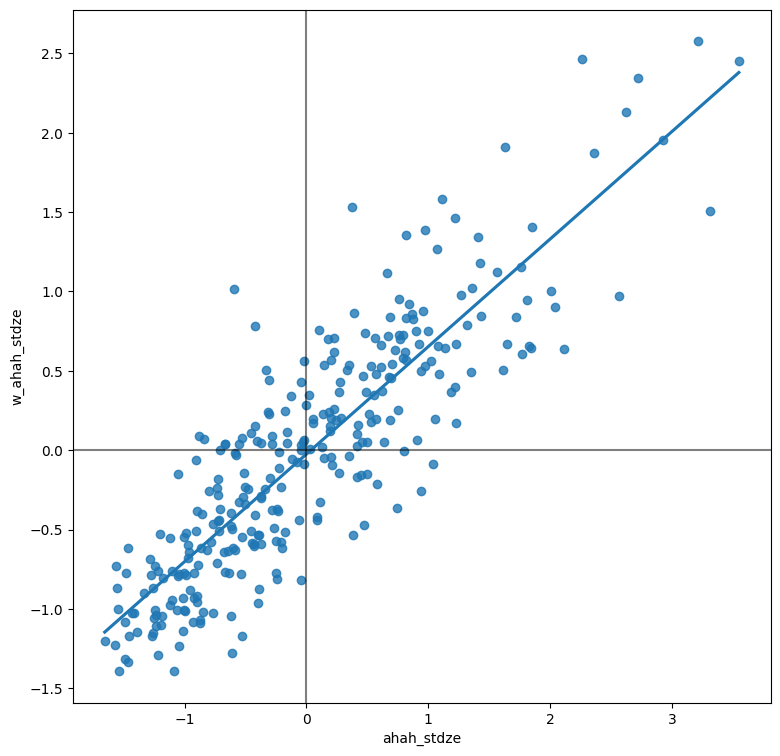

In [28]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot values
sns.regplot(x=moran_df['ahah_stdze'], y=moran_df['w_ahah_stdze'], ci=None)

# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)

# Display
plt.show()

#### Answer the question here:

Moran's plot show a positive spatial autocorrelation (slope of the fitted line). That means that the spatial distribution of the aha index is "consistent" in the sense that geometries (in this case lsoa11cd) with high (low) ahah index are surrounded by geometries with high (low) index as well. 

Note that the above is regarding the "global" spatial autocorrelation of the ahah index. We'll learn in the next exercise how to identify this in a local way :-) 